In [238]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
from pandas.api.types import is_string_dtype

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
import statsmodels
import statsmodels.api as sm
import pydotplus
from IPython.display import Image  
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [239]:
df_tested=pd.read_csv("titanic_train.csv")
df_tested.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S


In [240]:
df_tested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

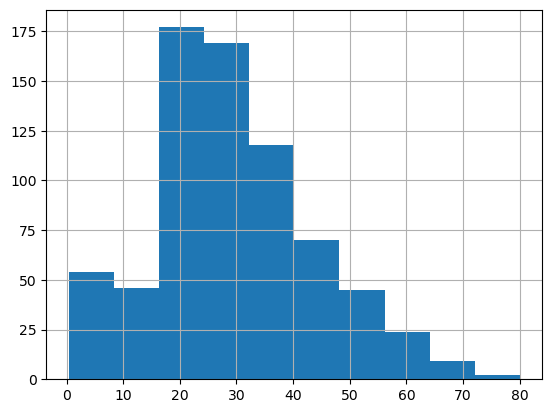

In [241]:
df_tested.Age.hist()

In [242]:

mean_age = df_tested["Age"].mean()
df_tested["Age"].fillna(mean_age, inplace=True)

In [243]:

mean_Fare = df_tested["Fare"].mean()
df_tested["Fare"].fillna(mean_Fare, inplace=True)

In [244]:
df_tested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [245]:
Total = df_tested.isnull().sum().sort_values(ascending = False)          
Percent = (df_tested.isnull().sum()*100/df_tested.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Cabin,687,77.104377
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


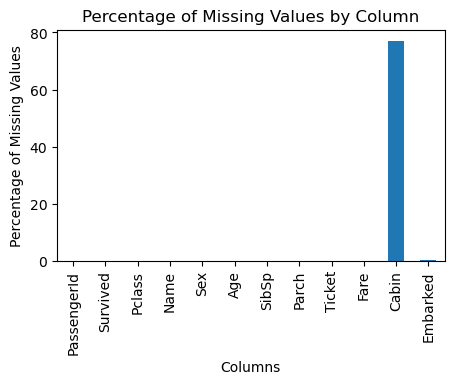

In [246]:
missing_percentage = (df_tested.isnull().sum() / len(df_tested)) * 100

plt.figure(figsize=(5, 3))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Column')
plt.show()

In [247]:
Q1 = df_tested.quantile(0.25)
Q3 = df_tested.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


In [248]:
df_tested.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [249]:
df_tested.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [250]:
df_tested.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

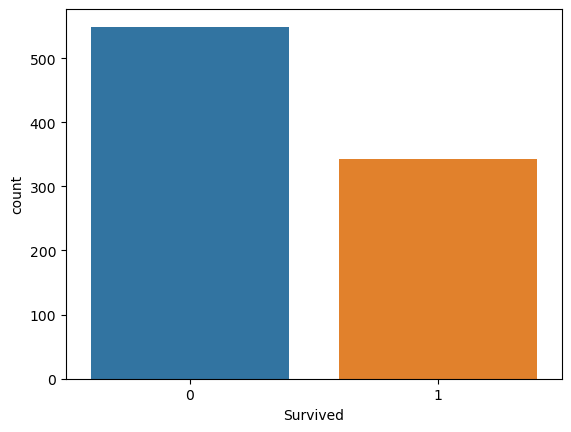

In [251]:
sns.countplot(x='Survived',data=df_tested)
plt.show()


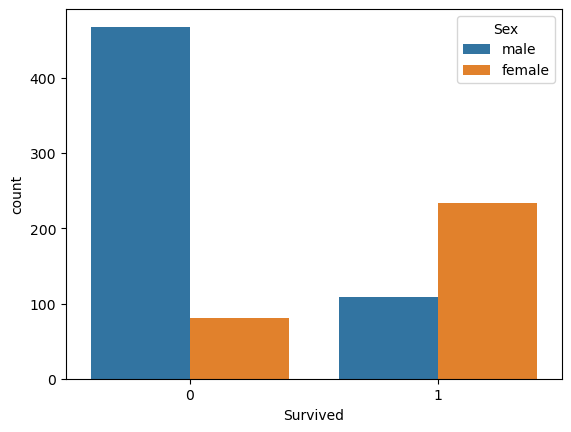

In [252]:
sns.countplot(x='Survived',data=df_tested,hue='Sex')
plt.show()


In [253]:
corr=df_tested.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [254]:
df_tested.drop(["PassengerId","Name","Cabin","Ticket"],axis=1,inplace=True)

In [255]:
df_features=df_tested.iloc[:,df_tested.columns!="Survived"]
df_target=df_tested.iloc[:,df_tested.columns=="Survived"]

In [256]:
df_features.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


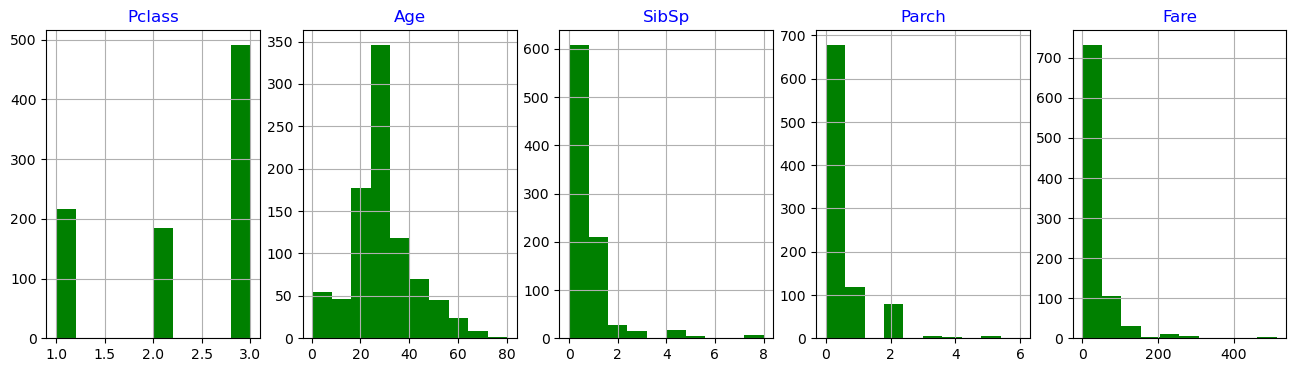

In [301]:
selected_columns = ['Pclass', 'Age', 'SibSp',"Parch","Fare"]  
fig, axes = plt.subplots(1, len(selected_columns), figsize=(16, 4))
axes = axes.flatten()

for i, col in enumerate(selected_columns):
    df_features[col].hist(ax=axes[i],color='green')
    axes[i].set_title(col ,color='blue')

plt.show()



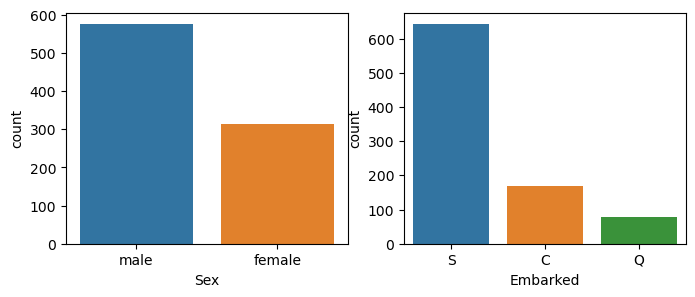

In [258]:
categorical=[]

for column in df_features:
    if is_string_dtype(df_features[column]):
        categorical.append(column)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,3))
for variable,subplot in zip(categorical,ax.flatten()):
    sns.countplot(x=df_tested[variable],ax=subplot)
plt.show()

In [259]:
corr=df_features.corr()
corr

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000


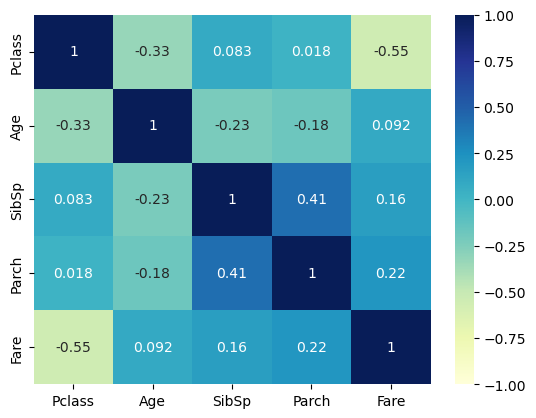

In [260]:
sns.heatmap(corr, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 10})
# mask=mask - Add this parameter to fetch upper/lower triangle of the heatmap   

# display the plot
plt.show()

In [261]:
df_cat=df_tested[categorical]
df_num=df_tested.drop(categorical,axis=1)
df_num

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [262]:
df_cat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [263]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)
df_cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [264]:
from sklearn.preprocessing import StandardScaler

standardScaler=StandardScaler()
fit=["Age","Fare"]
df_num[fit]=standardScaler.fit_transform(df_num[fit])
df_num

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,-0.592481,1,0,-0.502445
1,1,1,0.638789,1,0,0.786845
2,1,3,-0.284663,0,0,-0.488854
3,1,1,0.407926,1,0,0.420730
4,0,3,0.407926,0,0,-0.486337
...,...,...,...,...,...,...
886,0,2,-0.207709,0,0,-0.386671
887,1,1,-0.823344,0,0,-0.044381
888,0,3,0.000000,1,2,-0.176263
889,1,1,-0.284663,0,0,-0.044381


In [265]:
df_tested_dummy = pd.concat([df_num, df_cat_dummies], axis=1)

# display first five observations of the dummy dataframe
df_tested_dummy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.592481,1,0,-0.502445,1,0,1
1,1,1,0.638789,1,0,0.786845,0,0,0
2,1,3,-0.284663,0,0,-0.488854,0,0,1
3,1,1,0.407926,1,0,0.420730,0,0,1
4,0,3,0.407926,0,0,-0.486337,1,0,1


In [266]:
y = pd.DataFrame(df_tested_dummy['Survived'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [267]:
X = df_tested_dummy.drop('Survived',axis = 1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,-0.592481,1,0,-0.502445,1,0,1
1,1,0.638789,1,0,0.786845,0,0,0
2,3,-0.284663,0,0,-0.488854,0,0,1
3,1,0.407926,1,0,0.420730,0,0,1
4,3,0.407926,0,0,-0.486337,1,0,1


In [268]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [269]:
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

In [270]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                               index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [271]:
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')
    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Heart Disease Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [272]:
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

In [273]:
X = sm.add_constant(X)
X.head()

,const,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,3,-0.592481,1,0,-0.502445,1,0,1
1,1.0,1,0.638789,1,0,0.786845,0,0,0
2,1.0,3,-0.284663,0,0,-0.488854,0,0,1
3,1.0,1,0.407926,1,0,0.420730,0,0,1
4,1.0,3,0.407926,0,0,-0.486337,1,0,1


In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 9)
(623, 1)
(268, 9)
(268, 1)


In [275]:
log_reg_model = sm.Logit(y_train, X_train).fit()
log_reg_model.summary()

Optimization terminated successfully.
         Current function value: 0.431571
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      614
Method:                           MLE   Df Model:                            8
Date:                Sat, 10 Feb 2024   Pseudo R-squ.:                  0.3471
Time:                        12:33:01   Log-Likelihood:                -268.87
converged:                       True   LL-Null:                       -411.83
Covariance Type:            nonrobust   LLR p-value:                 4.055e-57
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1905      0.493      8.506      0.000       3.225       5.156
Pclass        -1.0626      0.171     -6.220      0.000      -1.397      -0.728
Age           -0.5087      0.127     -4.000      0.000      -0.758      -0.259
SibSp         -0.2772      0.125     -2.211      0.027      -0.523      -0.031
Parch         -0.2470      0.153     -1.616      0.106      -0.547       0.053
Fare           0.1381      0.136      1.017      0.309      -0.128       0.404
Sex_male      -2.8950      0.248    -11.666      0.000      -3.381      -2.409
Embarked_Q    -0.3874      0.471     -0.822      0.411      -1.311       0.536
Embarked_S    -0.4316      0.290     -1.486      0.137      -1.001       0.138
==============================================================================
"""

In [276]:
y_pred_prob = log_reg_model.predict(X_test)
y_pred_prob.head()

205    0.793785
44     0.724404
821    0.092476
458    0.685378
795    0.157251
dtype: float64

In [277]:
y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob]


In [278]:
y_pred = np.array(y_pred, dtype=np.float32)
y_pred[0:5]

array([1., 1., 0., 1., 0.], dtype=float32)

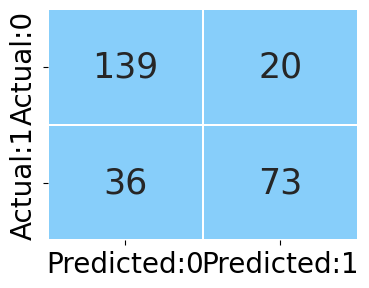

In [279]:
plt.figure(figsize=(4, 3))
plot_confusion_matrix(log_reg_model)

In [280]:
test_report=get_test_report(log_reg_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.78      0.67      0.72       109

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [281]:
kappa_value= kappa_score(log_reg_model)
print(kappa_value)

0.5567893213631799


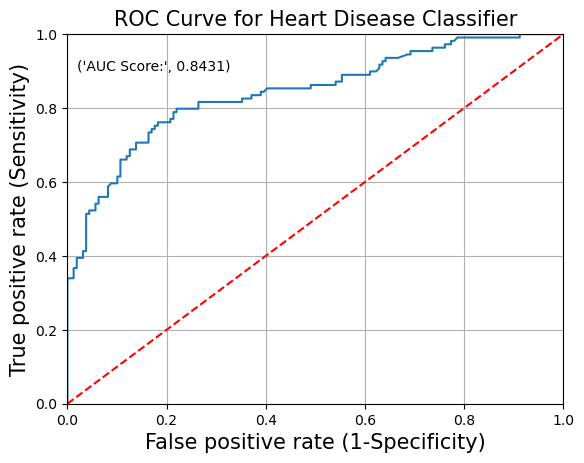

In [282]:
plot_roc(log_reg_model)

In [283]:
update_score_card(model_name= 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.843142,0.784946,0.669725,0.791045,0.556789,0.722772


In [284]:

rf_reg = RandomForestClassifier(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)


RandomForestClassifier(random_state=10)

In [285]:
y_pred = rf_reg.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0], dtype=int64)

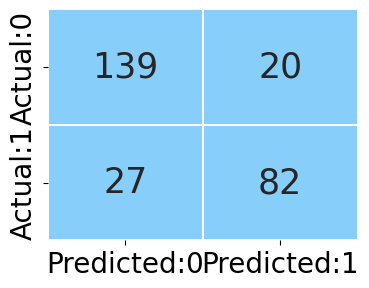

In [286]:
plt.figure(figsize=(4, 3))
plot_confusion_matrix(rf_reg)

In [287]:
test_report=get_test_report(rf_reg)
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       159
           1       0.80      0.75      0.78       109

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268



In [288]:
kappa_value= kappa_score(rf_reg)
print(kappa_value)

0.63289811144789


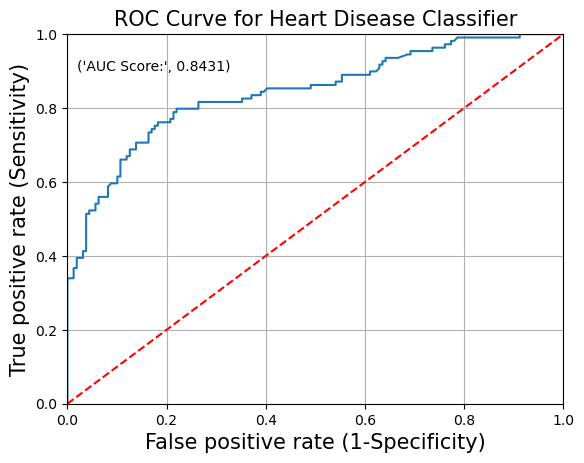

In [289]:
plot_roc(rf_reg)

In [290]:
update_score_card(model_name= 'Random Forest')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.843142,0.784946,0.669725,0.791045,0.556789,0.722772
1,Random Forest,0.843142,0.803922,0.752294,0.824627,0.632898,0.777251


In [291]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree_model = decision_tree.fit(X_train, y_train)

In [292]:
y_pred = decision_tree_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0], dtype=int64)

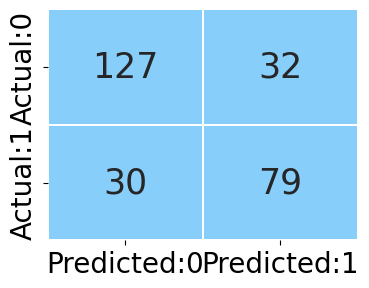

In [293]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(4, 3)) 
plot_confusion_matrix(decision_tree_model)


In [294]:
test_report = get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       159
           1       0.71      0.72      0.72       109

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [295]:
kappa_value = kappa_score(decision_tree_model)
print(kappa_value)

0.5220067890224958


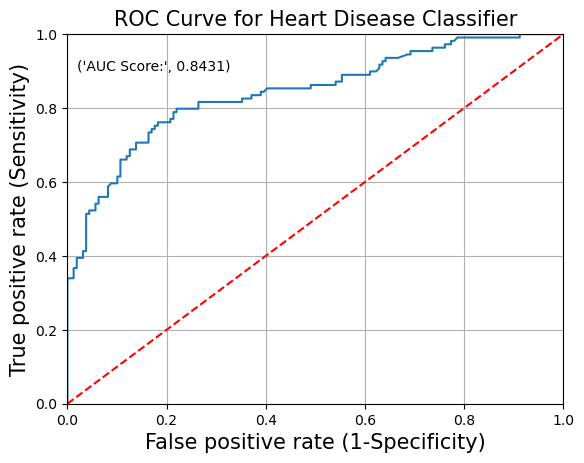

In [296]:
plot_roc(decision_tree_model)


In [297]:
update_score_card(model_name = 'Decision Tree (ENTROPY)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.843142,0.784946,0.669725,0.791045,0.556789,0.722772
1,Random Forest,0.843142,0.803922,0.752294,0.824627,0.632898,0.777251
2,Decision Tree (ENTROPY),0.843142,0.711712,0.724771,0.768657,0.522007,0.718182


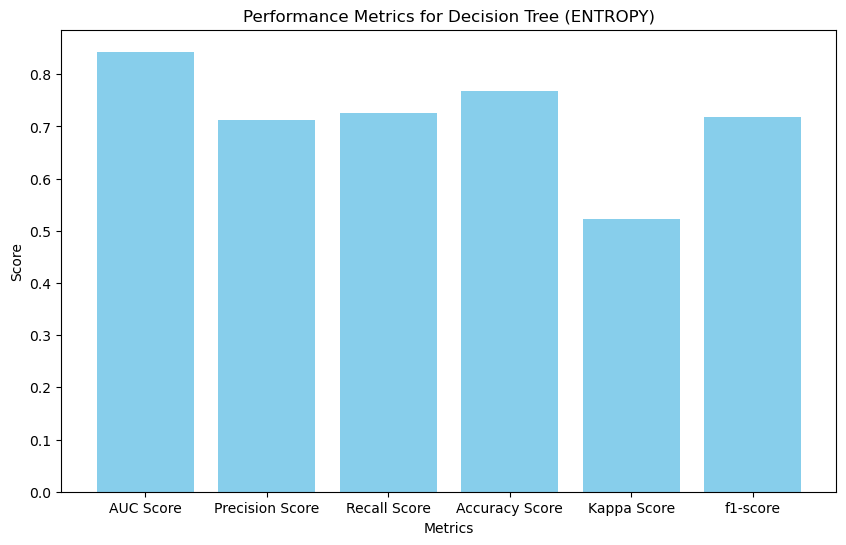

In [298]:
import matplotlib.pyplot as plt

def plot_performance_metrics(model_name, metrics):
    # Bar plot for performance metrics
    plt.figure(figsize=(10, 6))
    plt.bar(metrics.keys(), metrics.values(), color='skyblue')
    plt.title(f'Performance Metrics for {model_name}')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.show()

# Example usage:
model_name = 'Decision Tree (ENTROPY)'
metrics = {
    'AUC Score': 0.843142,
    'Precision Score': 0.711712,
    'Recall Score': 0.724771,
    'Accuracy Score': 0.768657,
    'Kappa Score': 0.522007,
    'f1-score': 0.718182
}

plot_performance_metrics(model_name, metrics)
